## What is TF-IDF?
TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

- Term Frequency(TF) = [number of times word appeared / total no of words in a document]
Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

- IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

- Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

   - TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)<br>
**Let's see a Sample Demo**

In [1]:
import pandas as pd
import numpy as np
import spacy


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
v = TfidfVectorizer()
out = v.fit_transform(corpus)

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
dir(out)

['T',
 '__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_allow_nd',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_ascontainer',
 '_asfptype',
 '_asindices',
 '_binopt',
 '_broadcast_to',
 '_bsr_container',
 '_container',
 '_coo_containe

In [5]:
feat_names = v.get_feature_names_out()

for word in feat_names:
    indx = v.vocabulary_.get(word)
    print(f'{word} : {v.idf_[indx]}')

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [6]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [7]:
out.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

## Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories
Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

- Text: Description of an item sold on e-commerce website
- Label: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [8]:
df = pd.read_csv("/kaggle/input/ecommerce-for-tfidf/Ecommerce_data.csv")

df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [9]:
df.columns

Index(['Text', 'label'], dtype='object')

In [10]:
df.shape

(24000, 2)

In [11]:
df.label.value_counts()

# This is very balanced data

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [12]:
# dummies = pd.get_dummies(df.label).astype(int)
# dummies.head()

# this is one method but certainly not applicable to the target column

df['target'] = df.label.map({'Household': 1, "Electronics": 2, "Clothing & Accessories": 3, "Books": 4})

df.target

0        1
1        1
2        2
3        3
4        3
        ..
23995    4
23996    4
23997    1
23998    2
23999    2
Name: target, Length: 24000, dtype: int64

In [13]:
df.head()

,Text,label,target
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,1
1,"Contrast living Wooden Decorative Box,Painted ...",Household,1
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['target'], stratify = df['target'], test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape

((19200,), (19200,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95      1200
           2       0.97      0.96      0.96      1200
           3       0.98      0.98      0.98      1200
           4       0.98      0.96      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<Axes: >

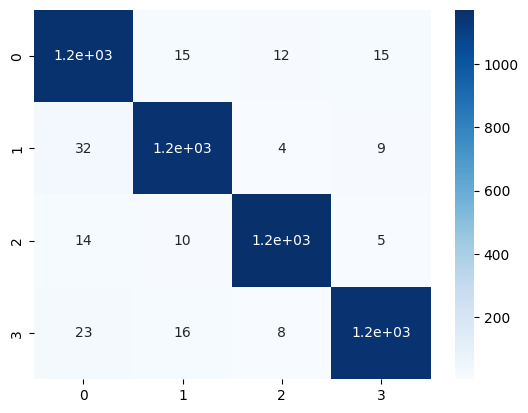

In [16]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap= 'Blues', annot = True)

In [17]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200
           4       0.99      0.94      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.97      0.96      0.96      4800
weighted avg       0.97      0.96      0.96      4800



<Axes: >

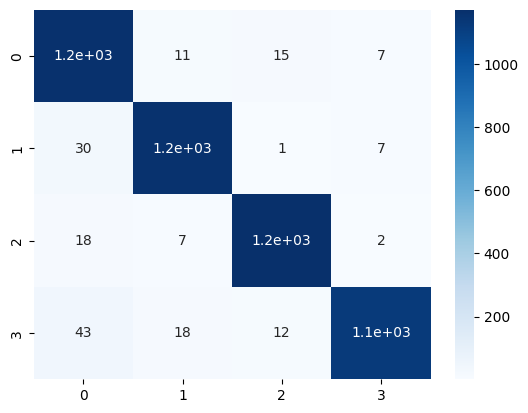

In [19]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap= 'Blues', annot = True)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('KNN', RandomForestClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.98      0.98      1200
           4       0.98      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<Axes: >

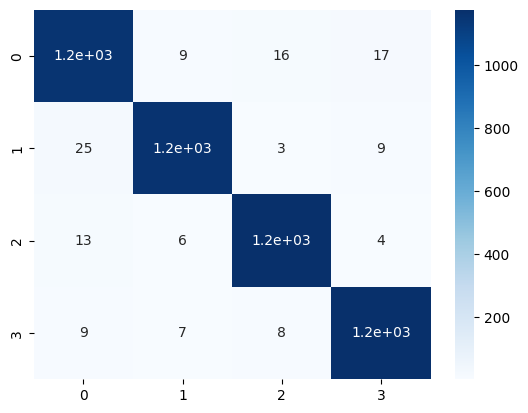

In [21]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap= 'Blues', annot = True)

## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [22]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [23]:
df['preprocess_text'] = df['Text'].apply(preprocess)

In [24]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [27]:
df.preprocess_text[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocess_text, 
    df.target,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.target
)

In [29]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.98      0.98      1200
           4       0.98      0.97      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1162,   15,   15,    8],
       [  17, 1177,    1,    5],
       [   8,    5, 1182,    5],
       [  15,   12,    4, 1169]])

Text(95.72222222222221, 0.5, 'Truth')

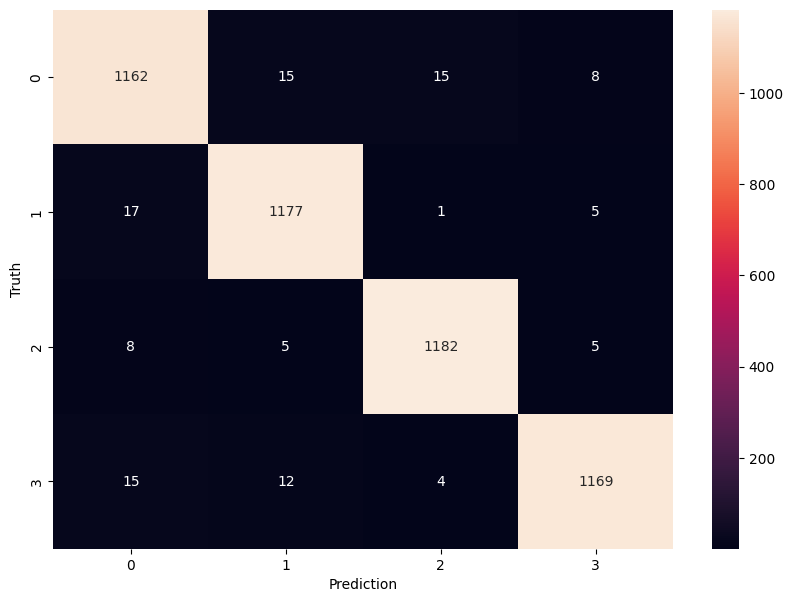

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')